In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\a.ramirez.lopez\AppData\Roaming\nltk_data...


True

# Sentiment Analysis

In this notebook we will use the nltk sentiment analysis model to use it as a support for our model. The notebook is only a test for saving the model and see the results it predicts.

This is a step in the final model that find mismatches in the data. This is intended to be used along with the propietary model to have an ensemble of the two models. A previous phase would be study if they mismatch the same examples or not to see how independent are. Also, focusing in the examples they both mismatch, if the mismatch makes sense from a human point of view or they are both wrong.

In [6]:
df_loaded = pd.read_csv('processed_text_with_all.csv')
df_loaded = df_loaded.dropna()

In [ ]:
sid = SentimentIntensityAnalyzer()

# Define a function to analyze polarity
def analyze_polarity(text):
    sentiment_score = sid.polarity_scores(text)['compound']
    return sentiment_score

# Add a polarity column to the copied DataFrame
df_loaded['Polarity'] = df_loaded.head(100)['Text'].apply(analyze_polarity)

In [13]:
def classify_sentiment(polarity):
    if polarity >= 0.5:
        return 'Positive'
    elif polarity <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df_loaded['Sentiment'] = df_loaded['Polarity'].apply(classify_sentiment)

We load the dataset with the polarities which we arleady computed since it takes a while to run the SentimentIntensityAnalyzer over all the dataframe

In [20]:
df_withpola = pd.read_csv('df_with_polarity.csv')

In [25]:
df_withpola['Sentiment'] = df_withpola['Polarity'].apply(classify_sentiment)

## Sentiment distribution

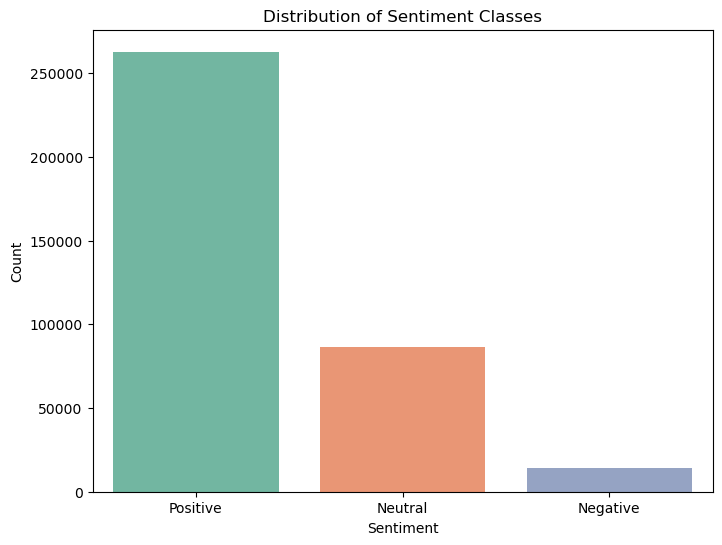

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df_withpola, palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Classes')
plt.show()

Now that we have the polarity we look for negative sentiments and positive labels and viceversa


In [ ]:
negative_sentiments = df_withpola[(df_withpola['Labels'] == 1) & (df_withpola['Sentiment'] == 'Negative')]

In [ ]:
positive_sentiments = df_withpola[(df_withpola['Labels'] == 0) & (df_withpola['Sentiment'] == 'Positive')]

### Here we have individiated potential mismatches in the data : 
- 5961 data samples have a positive score but the sentiment analysis model detected a negative sentiment
- 22400 ata samples have a negative score but the sentiment analysis model detected a positive sentiment